# MINOR ASSIGNMENT-4: MACHINE LEARNING- CLASSIFICATION, REGRESSION & CLUSTERING
  
### 1. Perform dimensionality reduction using scikit-learn’s TSNE estimator on the Iris dataset, then graph the results.

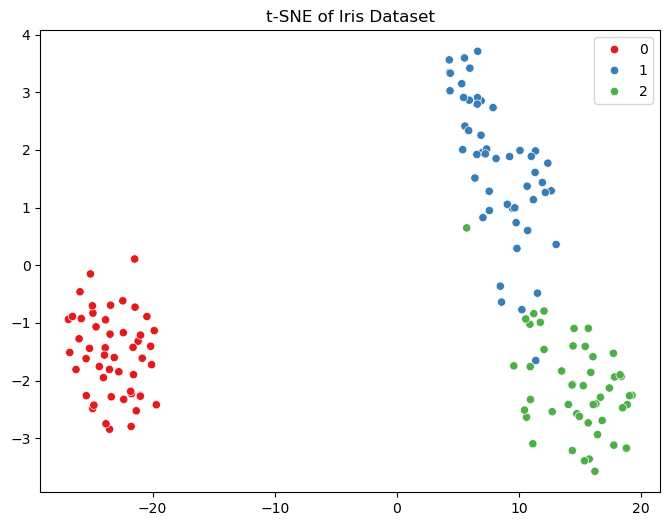

In [3]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data
y = iris.target

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='Set1')
plt.title('t-SNE of Iris Dataset')
plt.show()

### 2. Create a Seaborn pairplot graph for the California Housing dataset. Try the Matplotlib features to panning and zoom in on the diagram. These are accessible via the icons in the Matplotlib window.

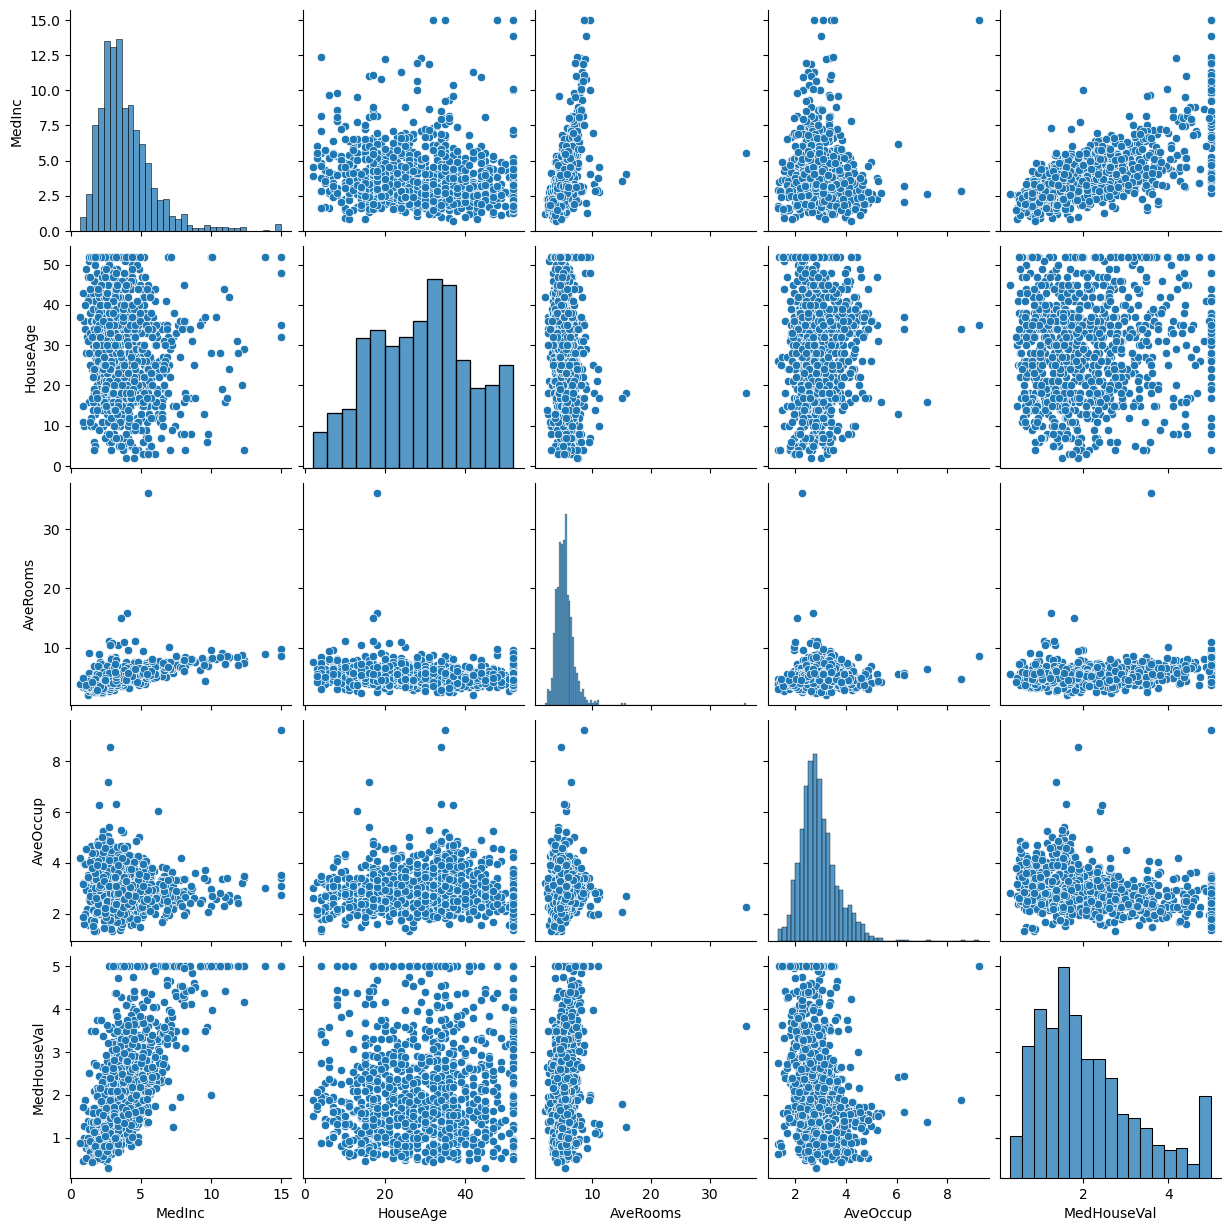

In [5]:
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

housing = fetch_california_housing(as_frame=True)
df = housing.frame
subset = df.sample(1000, random_state=42)
sns.pairplot(subset[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']])
plt.show()

### 3. Go to NOAA’s Climate at a Glance page and download the available time series data for the average annual temperatures of New York City from 1895 to today (1895-2025). Implement simple linear regression using average annual temperature data. Also, show how does the temperature trend compare to the average January high temperatures?

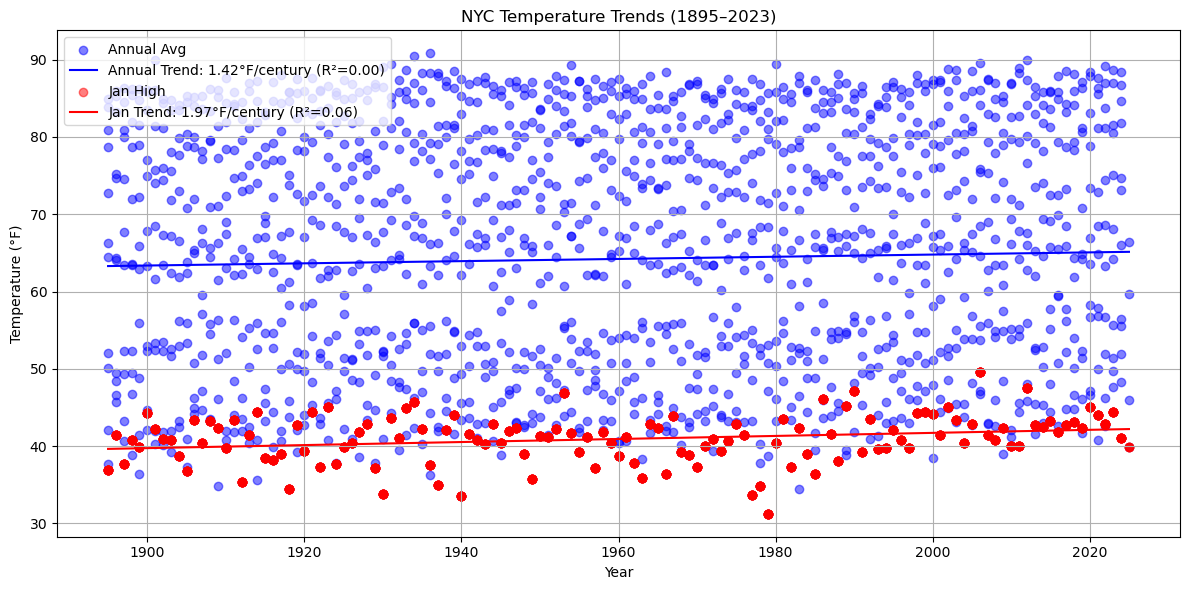

Annual warming: 1.42 °F/century | January: 1.97 °F/century | Diff: -0.56


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def load_data(file, col):
    df = pd.read_csv(file, comment='#')
    df = df[df['Value'] != -99]
    df['Year'] = df['Date'].astype(str).str[:4].astype(int)
    return df[['Year', 'Value']].rename(columns={'Value': col})

def trend(df, col):
    X, y = df[['Year']], df[col]
    model = LinearRegression().fit(X, y)
    return model.predict(X), model.coef_[0] * 100, model.score(X, y)

df = pd.merge(load_data('Avg_Data.csv', 'Annual_Avg'), 
              load_data('Jan_Data.csv', 'Jan_High'), 
              on='Year')

df['Annual_Trend'], a_rate, a_r2 = trend(df, 'Annual_Avg')
df['Jan_Trend'], j_rate, j_r2 = trend(df, 'Jan_High')

plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Annual_Avg'], alpha=0.5, label='Annual Avg', color='blue')
plt.plot(df['Year'], df['Annual_Trend'], 'b', 
         label=f'Annual Trend: {a_rate:.2f}°F/century (R²={a_r2:.2f})')

plt.scatter(df['Year'], df['Jan_High'], alpha=0.5, label='Jan High', color='red')
plt.plot(df['Year'], df['Jan_Trend'], 'r', 
         label=f'Jan Trend: {j_rate:.2f}°F/century (R²={j_r2:.2f})')

plt.title('NYC Temperature Trends (1895–2023)')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Annual warming: {a_rate:.2f} °F/century | January: {j_rate:.2f} °F/century | Diff: {(a_rate - j_rate):.2f}")


### 4. Load the Iris dataset from the scikit-learn library and perform classification on it with the k-nearest neighbors algorithm. Use a KNeighborsClassifier with the default k value. What is the prediction accuracy?

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {accuracy:.2f}")

Prediction Accuracy: 1.00


### 5. You are given a dataset of 2D points with their corresponding class labels. The dataset is as follows:

```
Point ID  x   y   Class
A         2.0 3.0 0
B         1.0 1.0 0
C         4.0 4.0 1
D         5.0 2.0 1
```

A new point P with coordinates (3.0, 3.0) needs to be classified using the KNN algorithm. Use the Euclidean distance to calculate the distance between points.

In [11]:
import numpy as np

points = {
    'A': (2.0, 3.0),
    'B': (1.0, 1.0),
    'C': (4.0, 4.0),
    'D': (5.0, 2.0)
}
labels = {'A': 0, 'B': 0, 'C': 1, 'D': 1}

P = (3.0, 3.0)

distances = {pt: np.linalg.norm(np.array(coords) - np.array(P)) for pt, coords in points.items()}
sorted_pts = sorted(distances.items(), key=lambda x: x[1])
print(distances)
# For k=3
k = 3
votes = [labels[pt] for pt, _ in sorted_pts[:k]]
prediction = max(set(votes), key=votes.count)
print(f"Predicted class for P: {prediction}")

{'A': 1.0, 'B': 2.8284271247461903, 'C': 1.4142135623730951, 'D': 2.23606797749979}
Predicted class for P: 1


### 6. A teacher wants to classify students as ”Pass” or ”Fail” based on their performance in three exams. The dataset includes three features:

```
Exam 1 Score  Exam 2 Score  Exam 3 Score  Class (Pass/Fail)
85            90            88            Pass
70            75            80            Pass
60            65            70            Fail
50            55            58            Fail
95            92            96            Pass
45            50            48            Fail
```

A new student has the following scores:
- Exam 1 Score: 72
- Exam 2 Score: 78
- Exam 3 Score: 75

Classify this student using the K-Nearest Neighbors (KNN) algorithm with k = 3.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X = np.array([
    [85, 90, 88],
    [70, 75, 80],
    [60, 65, 70],
    [50, 55, 58],
    [95, 92, 96],
    [45, 50, 48]
])
y = ['Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Fail']

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

new_student = np.array([[72, 78, 75]])
prediction = knn.predict(new_student)
print(f"Prediction: {prediction[0]}")

Prediction: Pass


### 7. Using scikit-learn’s KFold class and the cross val score function, determine the optimal value for k to classify the Iris dataset using a KNeighborsClassifier.

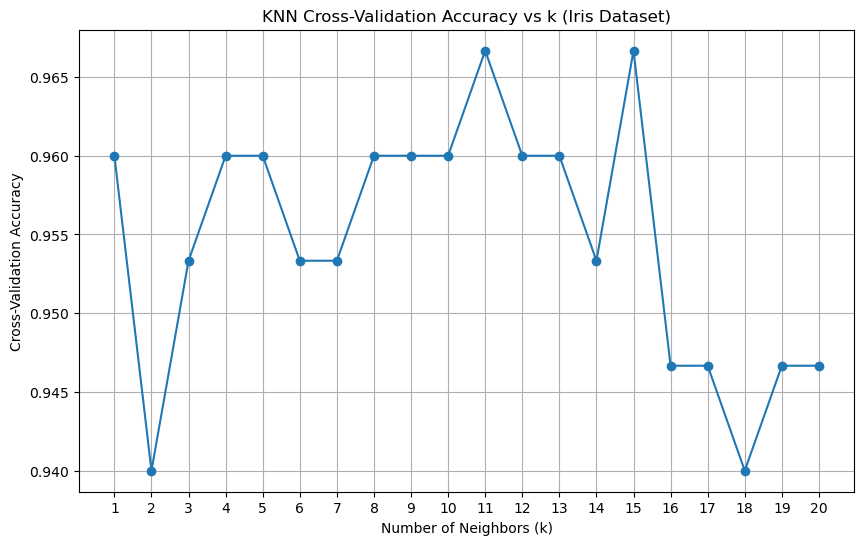

Optimal number of neighbors (k): 11


In [15]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target
kf = KFold(n_splits=5, shuffle=True, random_state=0)
k_values = range(1, 21)
mean_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=kf)
    mean_scores.append(scores.mean())
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title("KNN Cross-Validation Accuracy vs k (Iris Dataset)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.grid(True)
plt.xticks(k_values)
plt.show()
optimal_k = k_values[np.argmax(mean_scores)]
print (f"Optimal number of neighbors (k): {optimal_k}")

### 8. Write a Python script to perform K-Means clustering on the following dataset:

```
Dataset: {(1, 1), (2, 2), (3, 3), (8, 8), (9, 9), (10, 10)}
```

Use k=2 and visualize the clusters.

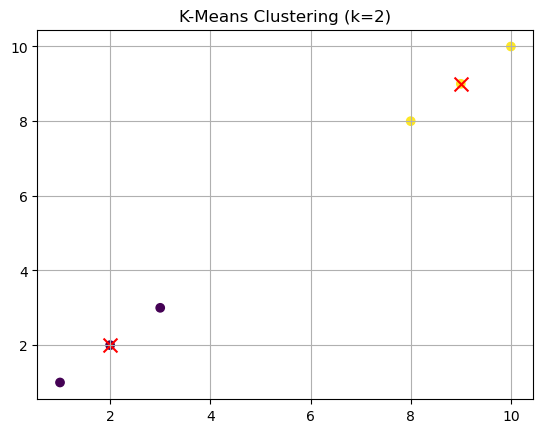

In [17]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[1, 1], [2, 2], [3, 3], [8, 8], [9, 9], [10, 10]])

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(data)

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(*kmeans.cluster_centers_.T, color='red', marker='x', s=100)
plt.title("K-Means Clustering (k=2)")
plt.grid(True)
plt.show()

### 9. Write a Python script to perform K-Means clustering on the following dataset: Mall Customer Segmentation. Use k = 5 (also, determine optimal k via the Elbow Method) and visualize the clusters to identify customer segments.

**Expected Output:**
- Scatter plot showing clusters (e.g., “High Income-Low Spenders,” “Moderate Income-Moderate Spenders”).
- Insights for targeted marketing strategies.

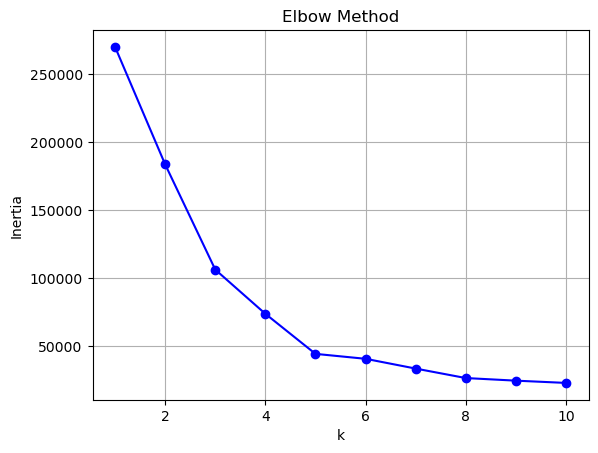

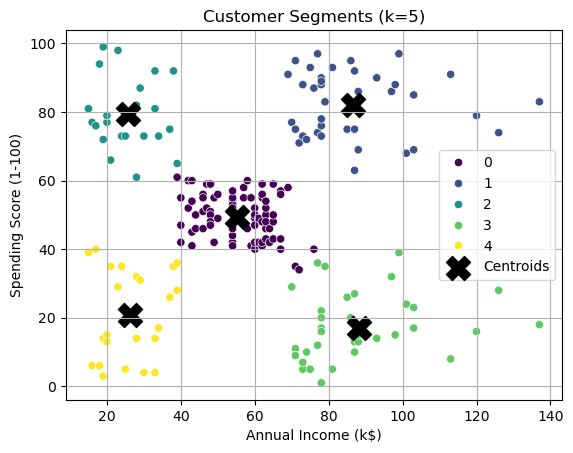

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

inertia = []
for k in range(1, 11):
    inertia.append(KMeans(n_clusters=k, random_state=42).fit(X).inertia_)

plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, marker='X', label='Centroids')
plt.title('Customer Segments (k=5)')
plt.legend()
plt.grid()
plt.show()

### 10. Perform the following tasks using the pandas Series object:

(a) Create a Series from the list [7, 11, 13, 17].

(b) Create a Series with five elements where each element is 100.0.

(c) Create a Series with 20 elements that are all random numbers in the range 0 to 100. Use the describe method to produce the Series’ basic descriptive statistics.

(d) Create a Series called temperatures with the following floating-point values: 98.6, 98.9, 100.2, and 97.9. Use the index keyword argument to specify the custom indices ’Julie’, ’Charlie’, ’Sam’, and ’Andrea’.

(e) Form a dictionary from the names and values in Part (d), then use it to initialize a Series.

In [23]:
import pandas as pd
import numpy as np
a = pd.Series([7, 11, 13, 17])
b = pd.Series([100.0] * 5)
c = pd.Series(np.random.randint(0, 101, 20))
temps = pd.Series ([98.6, 98.9, 100.2, 97.9], index=['Julie', 'Charlie', 'Sam', 'Andrea'])
e = pd.Series({'Julie': 98.6, 'Charlie': 98.9, 'Sam': 100.2, 'Andrea': 97.9})
print("a:", a.tolist())
print("b:", b.tolist())
print("c (first 5):", c.head().tolist())
print("c stats (min, max, mean):", round(c.min(),1), round(c.max(),1), round(c.mean(),1))
print("temps:", temps.to_dict())
print("e equals temps?", e.equals(temps))

a: [7, 11, 13, 17]
b: [100.0, 100.0, 100.0, 100.0, 100.0]
c (first 5): [92, 86, 53, 49, 32]
c stats (min, max, mean): 1 93 42.0
temps: {'Julie': 98.6, 'Charlie': 98.9, 'Sam': 100.2, 'Andrea': 97.9}
e equals temps? True
